# <span style="color:red">프로젝트2</span> : 와인 품질(Quality) 분류 경진대회

## <span style="color:orange">배경공부</span> : 0단계

##### 배경공부한 것 정리 [이를 토대로 시각화한 그래프와 함께 비교 후 데이터 전처리(변수변환 or 파생변수 생성) 진행]
- 따로 공부함. 정리는 안함

## <span style="color:blue">EDA</span> : 1단계

- index : 구분자 <span style="color:green">[범주형-순서형]</span> 의미 없음
- quality : 품질 <span style="color:blue">[범주형-명목형]</span> 3 ~ 9(높을 수록 좋은 품질) [종속변수]
- fixed acidity : 산도 <span style="color:red">[수치형-연속형]</span> 
- volatile acidity : 휘발성산 <span style="color:red">[수치형-연속형]</span> 
- citric acid : 시트르산 <span style="color:red">[수치형-연속형]</span> 
- residual sugar : 잔당(발효 후 와인 속에 남아있는 당분) <span style="color:red">[수치형-연속형]</span> 
- chlorides : 염화물 <span style="color:red">[수치형-연속형]</span> 
- free sulfur dioxide : 독립 이산화황 <span style="color:red">[수치형-연속형]</span> 
- total sulfur dioxide : 총 이산화황 <span style="color:red">[수치형-연속형]</span> 
- density : 밀도 <span style="color:red">[수치형-연속형]</span> 
- pH : 수소이온농도 <span style="color:red">[수치형-연속형]</span> 
- sulphates : 황산염 <span style="color:red">[수치형-연속형]</span> 
- alcohol : 도수 <span style="color:red">[수치형-연속형]</span> 
- type : 종류 <span style="color:blue">[범주형-명목형]</span> white or red
---
##### [표1] 자료 형태 파악하기
|분류|데이터|설명|예시|
|:---:|:---:|:---:|:---:|
|범주형|명목형|숫자로 표시할 수 없으나, 편의상 숫자화.|남자-0, 여자-1|
|범주형|순서형|숫자로  표시할 수 없으나, 편의상 숫자화. (순위 개념)|소득분위 10분위 > 9 분위 > 8 분위|
|수치형|연속형|데이터가 연속량으로서 셀 수 있는 형태|키 - 166.1cm|
|수치형|이산형|데이터가 비연 속량으로서 셀 수 있는 형태|자식 수 5명|

In [66]:
# Raekkkky's EDA Setting
import numpy as np # 과학 계산 및 수학 계산
import pandas as pd # 데이터 처리 및 분석
# matplotlib 기반으로 만들어진, 하지만 더 강력한 데이터 시각화 기능을 가지고 있는 seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
# 브라우저에서 바로 그림을 볼 수 있게 해주는 것
import warnings # 경고 안뜨게 하기
warnings.filterwarnings('ignore')

In [3]:
# Load Data
train = pd.read_csv('/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project2/train.csv')
test = pd.read_csv('/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project2/test.csv')
sample_submisson = pd.read_csv('/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project2/sample_submission.csv')

In [4]:
train.head() #train.describe(include = 'all')

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
test.head() #test.describe(include = 'all')

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [6]:
train.info() #train.isnull().sum() #train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [7]:
test.info() #test.isnull().sum() #test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


1. train, test 데이터 둘 다 결측치가 없다.
2. train은 14개의 변수와 5497개의 값을 가지고 있다.
3. test는 13개의 변수와 1000개의 값을 가지고 있다.
4. 품질을 뜻하는 종속변수 "quality"는 3~9의 변수를 가지며 그 중, 6이 가장 많다.
5. train의 종속변수를 제외하면 각각 독립변수 후보는 12개이다.

Text(0.5, 1.0, 'dist. of type')

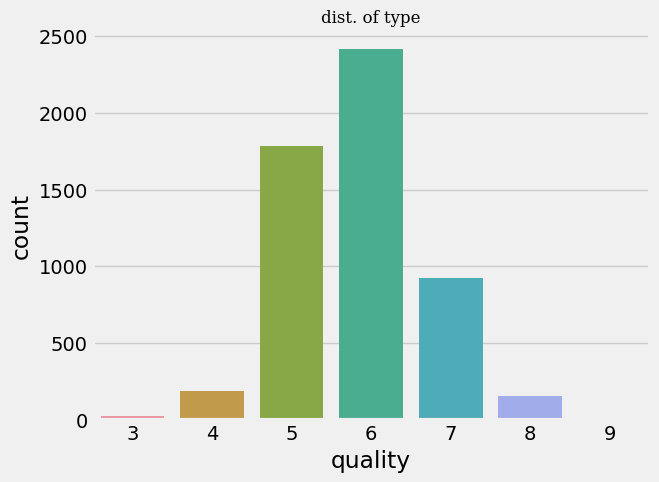

In [8]:
# 위에 quality 빈도수 확인 한 것을 시각화 한 것     # train['quality'].value_counts()
sns.countplot(x = train['quality'])
plt.title("dist. of type", fontfamily = 'serif', fontsize = 12)

<Axes: >

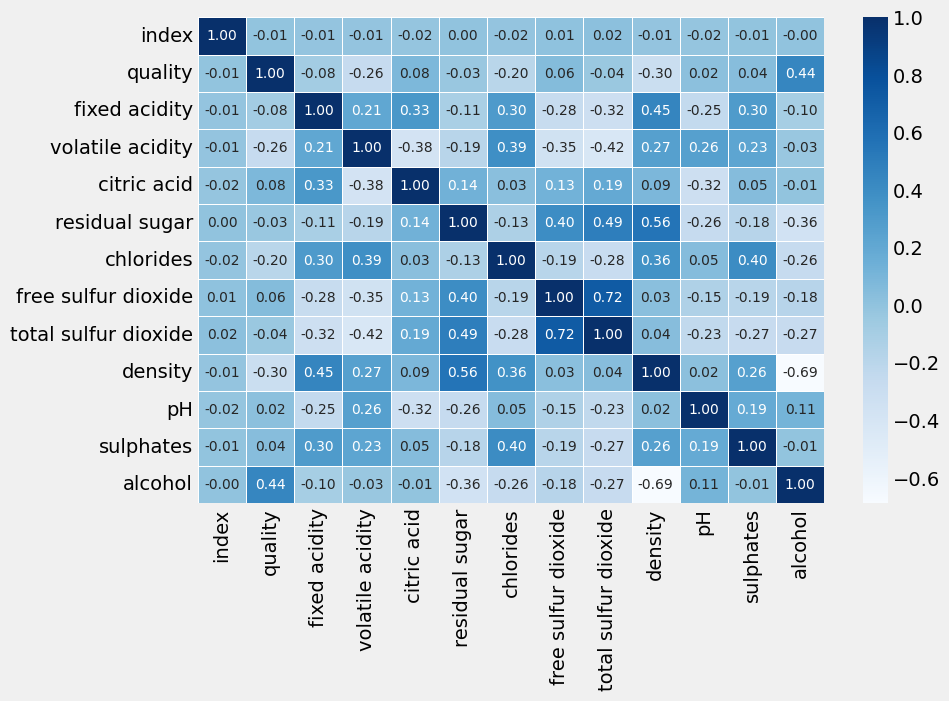

In [9]:
# [상관관계와 인관관계는 다름] train의 변수 간 상관관계 # train.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(data = train.corr(), annot=True, annot_kws={"size": 10}, fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

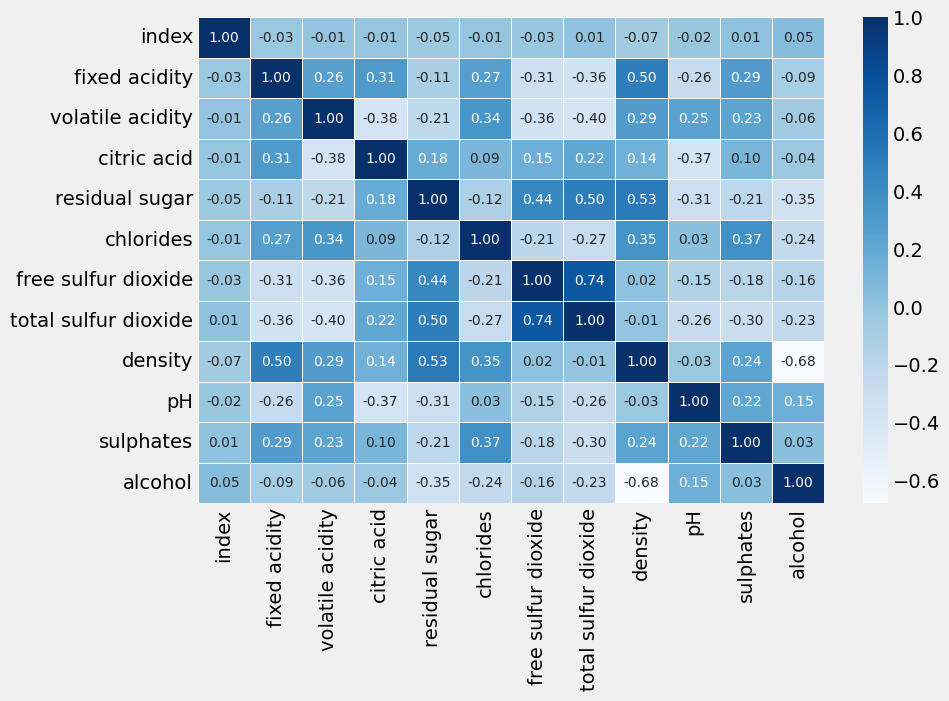

In [10]:
# [상관관계와 인관관계는 다름] test의 변수 간 상관관계 # test.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(data = test.corr(), annot=True, annot_kws={"size": 10}, fmt = '.2f', linewidths=.5, cmap='Blues')

#### train 데이터 상관관계 분석 [0.4는 이상인 것들 기준]
- index는 그 어떤 것도 관계성이 없음
- quality는 alchol과 관련성이 0.44로 가장 높음
- fixed acidity는 density와 0.45로 가장 높음
- volatile acidity는 total sulfur dioxide와 관련성이 - 0.42로 가장 높음
- citric acid는 그나마 volatile acidity과 -0.38로 그나마 높음
- residual sugar은 density와 0.56으로 가장 높음
- 그 외, total sulfur dioxide과는 0.49, free sulfur dioxide와 0.40의 관계성을 가짐
- chlorides는 sulphates와 0.40으로 가장 높음 그리고 volatile acidity와는 0.39로 2등
- free sulfur dioxide는 total sulfur dioxide와 0.72로 가장 관계성이 높음, residual sugar과 0.40으로 2등
- density는 alchol과 -0.69로 관계성이 높음

- 결론 : density(밀도)와 alchol(도수)과 -0.69로 가장 음의 상관관계가 높게 나타났으며
- free sulfur dioxide(독립이산화황)는 total sulfur dioxide(총이상화황)와 0.72로 양의 상관관계가 높게 나타났다.

#### test 데이터도 비슷한데 결론만 보면
- 똑같이 density(밀도)와 alchol(도수)과 -0.68로 가장 음의 상관관계가 높게 나타났으며
- free sulfur dioxide(독립이산화황)는 total sulfur dioxide(총이상화황)와 0.74로 양의 상관관계가 높게 나타났다.
- 유일하게 0.5 이상인 관계는 2가지였는데,
- fixed acidity, density = 0.5
- residual sugar, sulfur dioxide = 0.5
- residual sugar, density = 0.53

## <span style="color:yellow">전처리</span> : 2단계

In [17]:
# index 열(변수)는 삭제한다. [무의미한 자료]
train = train.drop(['index'], axis = 1)
test = test.drop(['index'], axis = 1)
# type에는 white와 red 두 종류가 있는데 각각 0,1로 변수변환해야 한다.
train['type'] = train['type'].map({'white':0, 'red':1}).astype(int)
test['type'] = test['type'].map({'white':0, 'red':1}).astype(int)

## <span style="color:green">시각화</span> : 3단계 [6주차 공부]

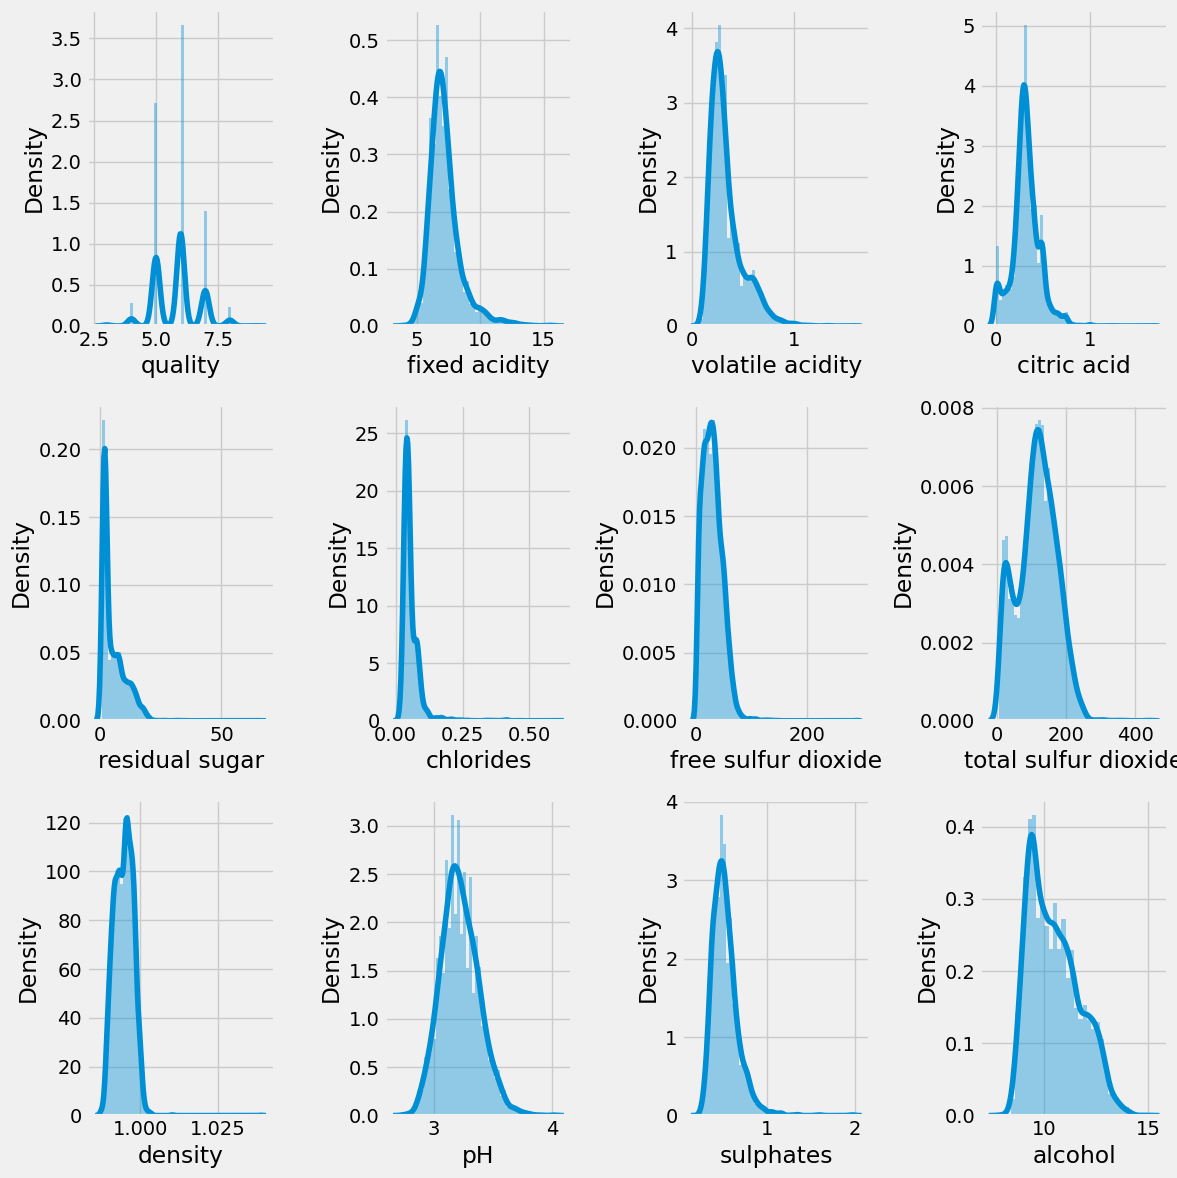

In [11]:
# train의 각 변수별 분포를 "distplot"으로 살펴보기 
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

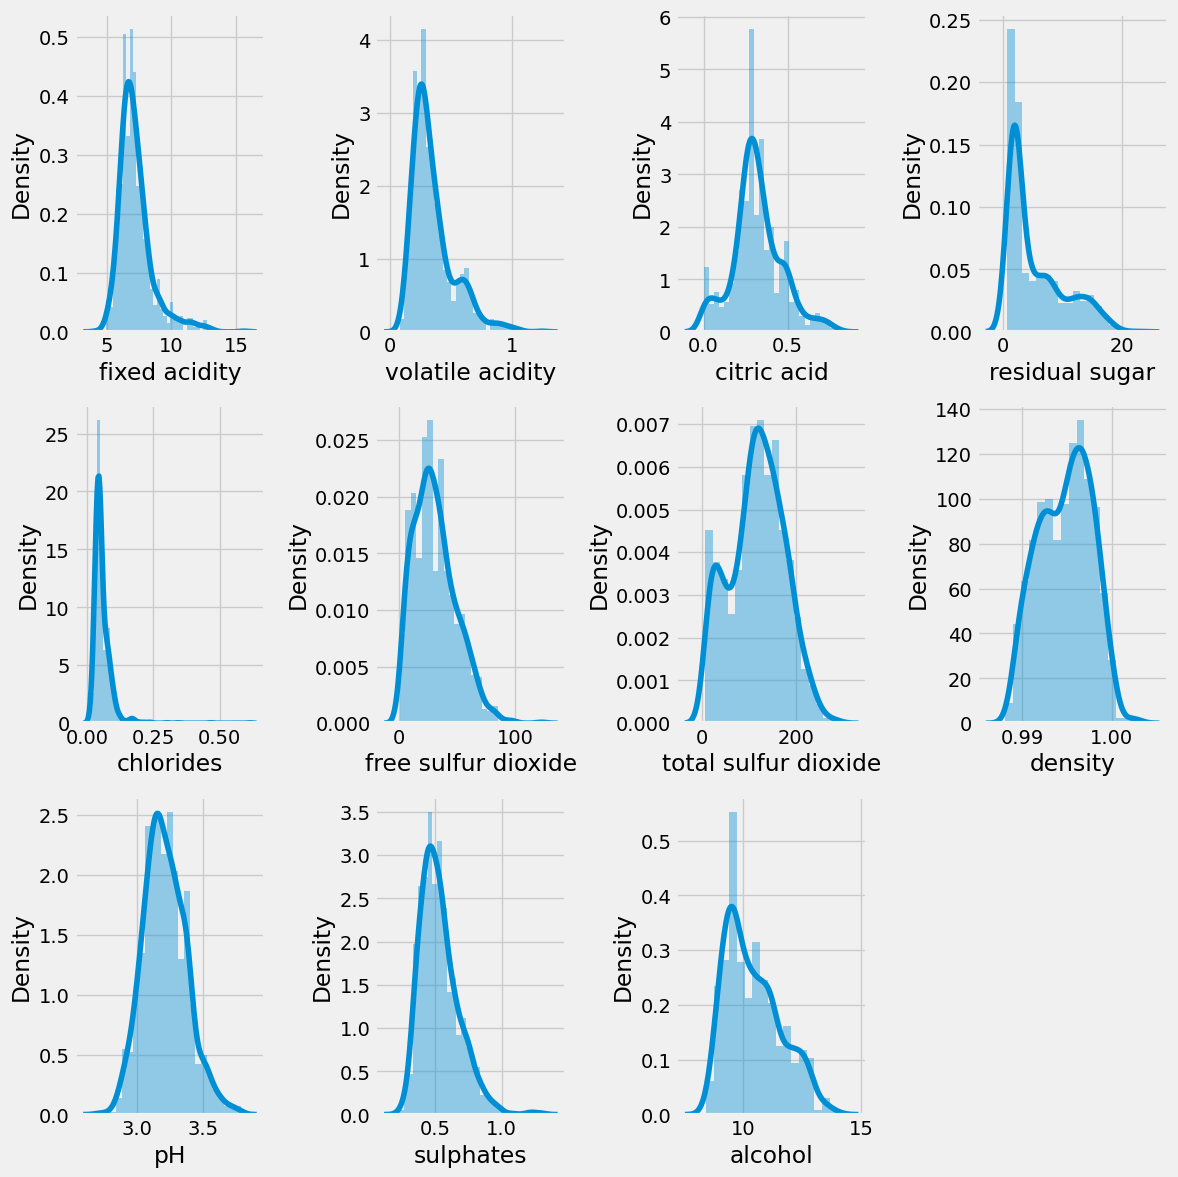

In [12]:
# test의 각 변수별 분포를 "distplot"으로 살펴보기 
plt.figure(figsize=(12,12))
for i in range(1,12):
    plt.subplot(3,4,i)
    sns.distplot(test.iloc[:,i])
plt.tight_layout()
plt.show()

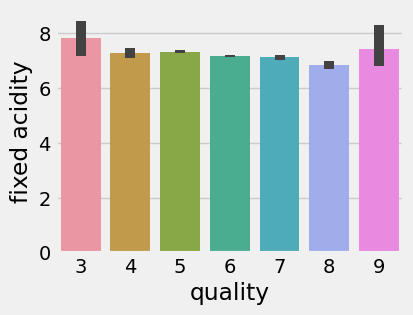

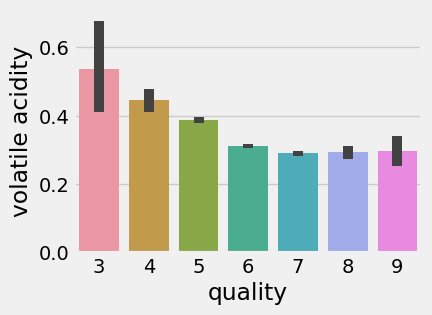

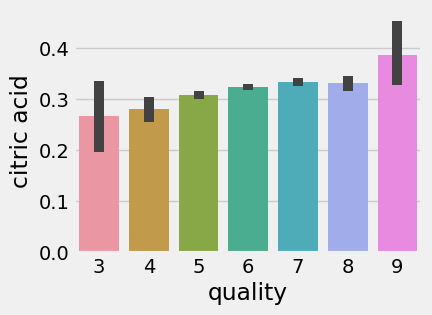

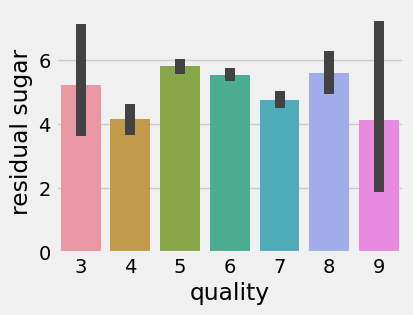

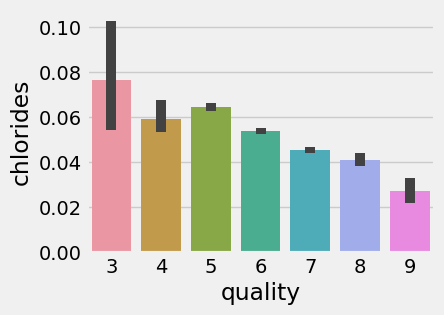

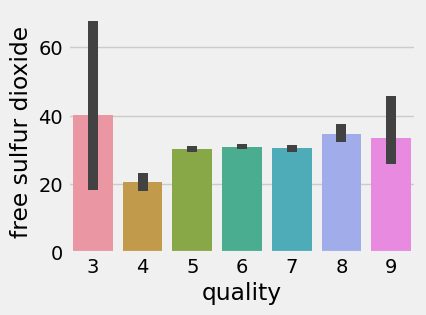

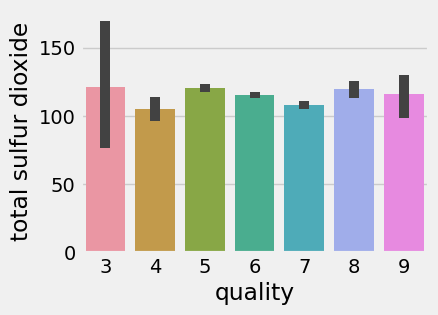

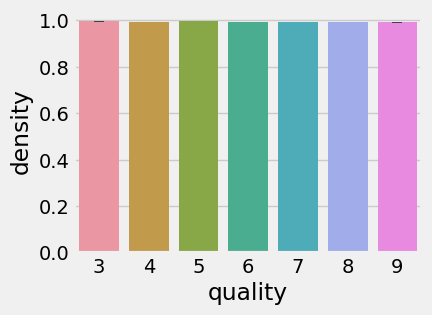

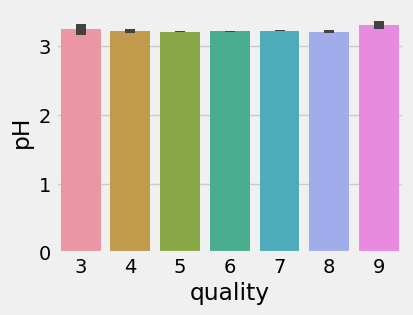

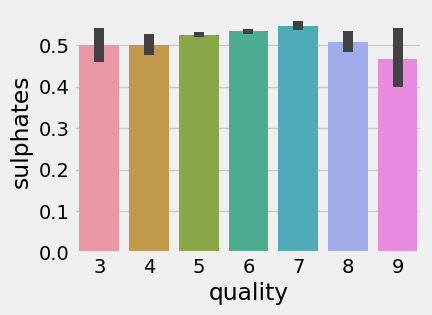

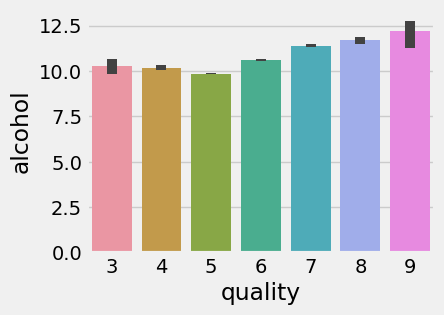

In [13]:
# train에서 각 변수와 quality 변수 사이 분포를 "barplot"으로 확인하기!
for i in range(11):
    fig = plt.figure(figsize = (4, 3))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)

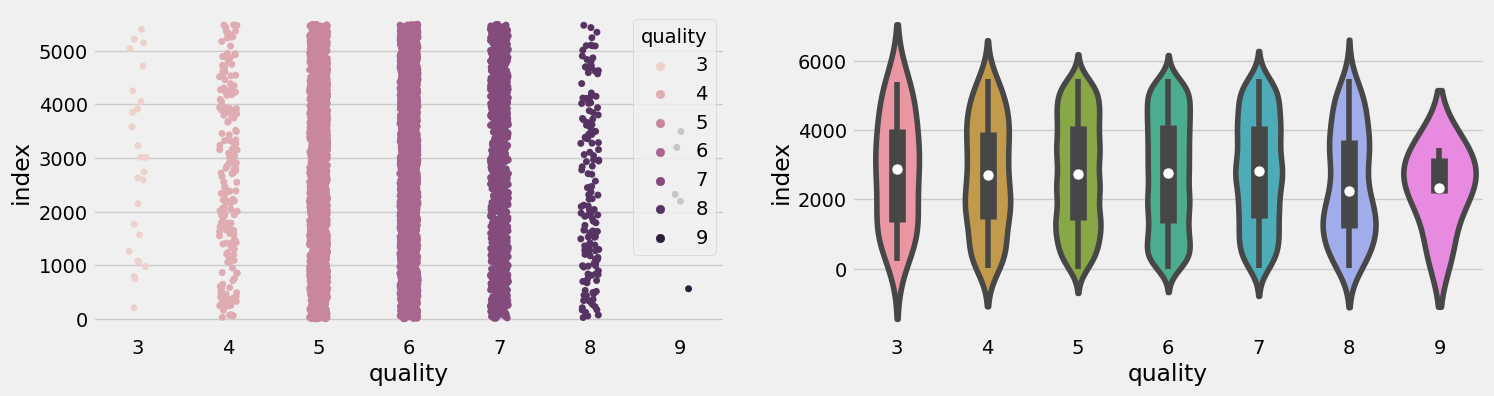

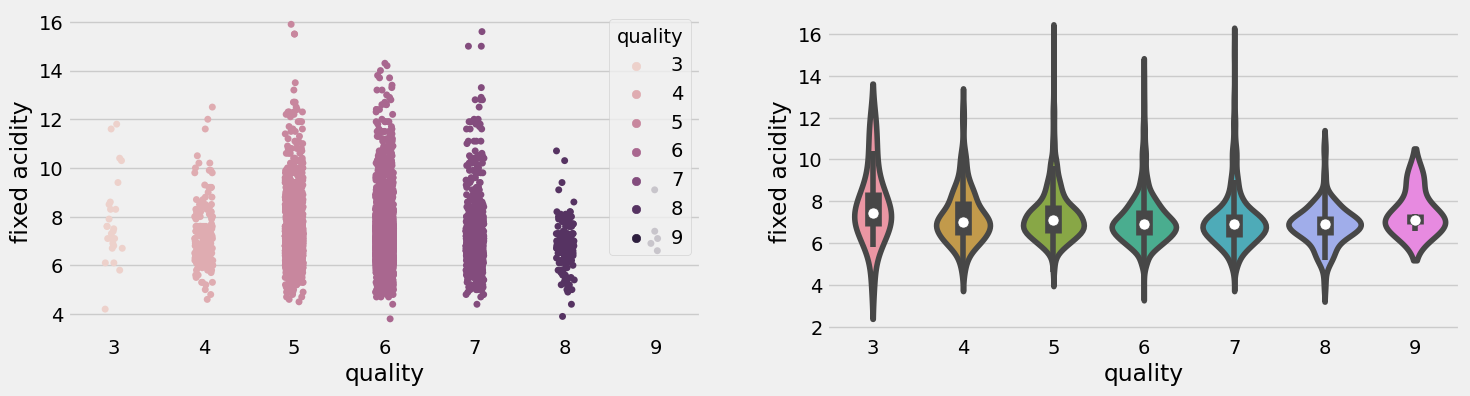

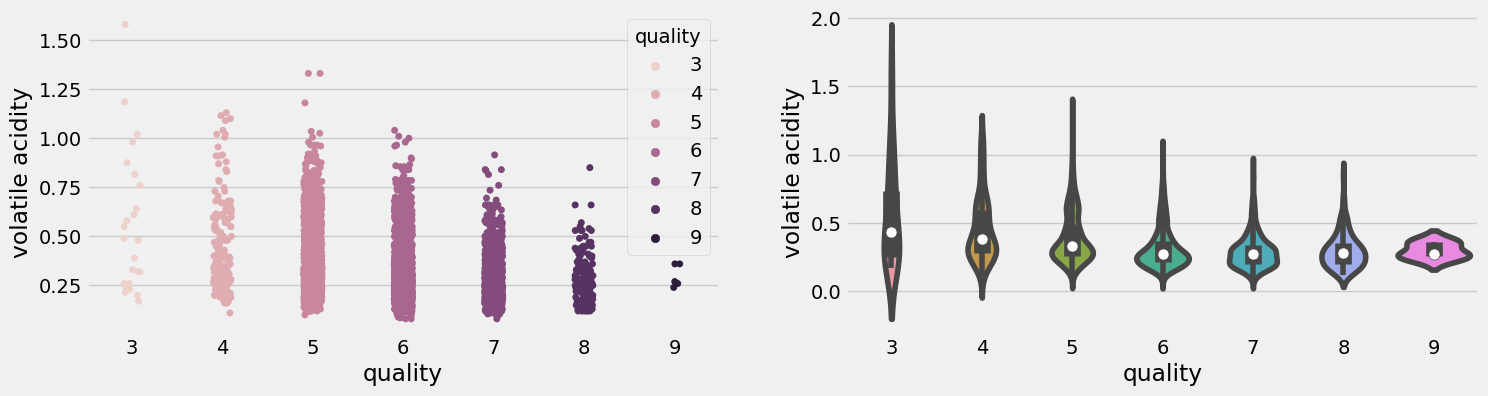

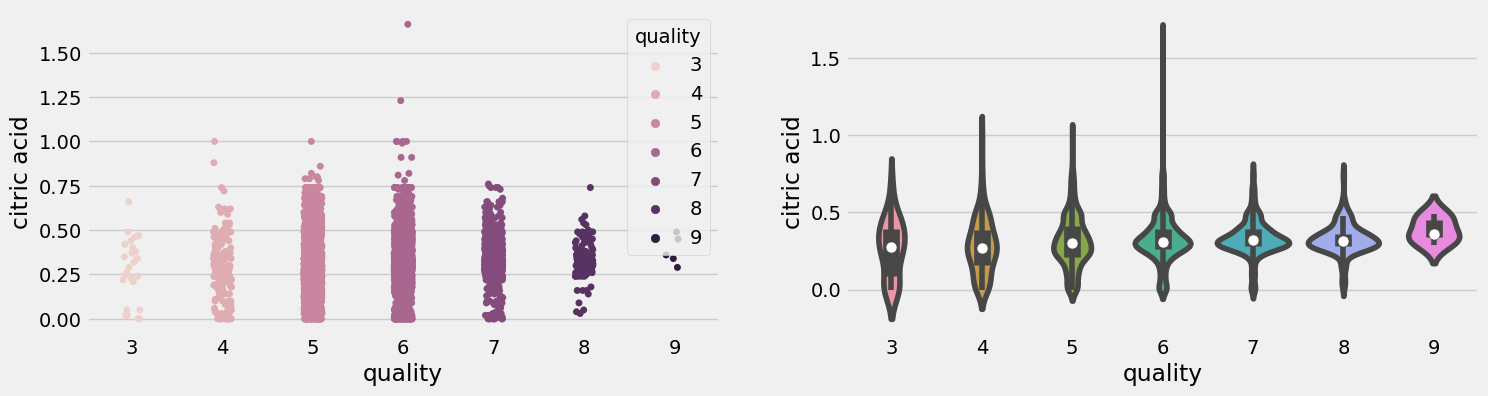

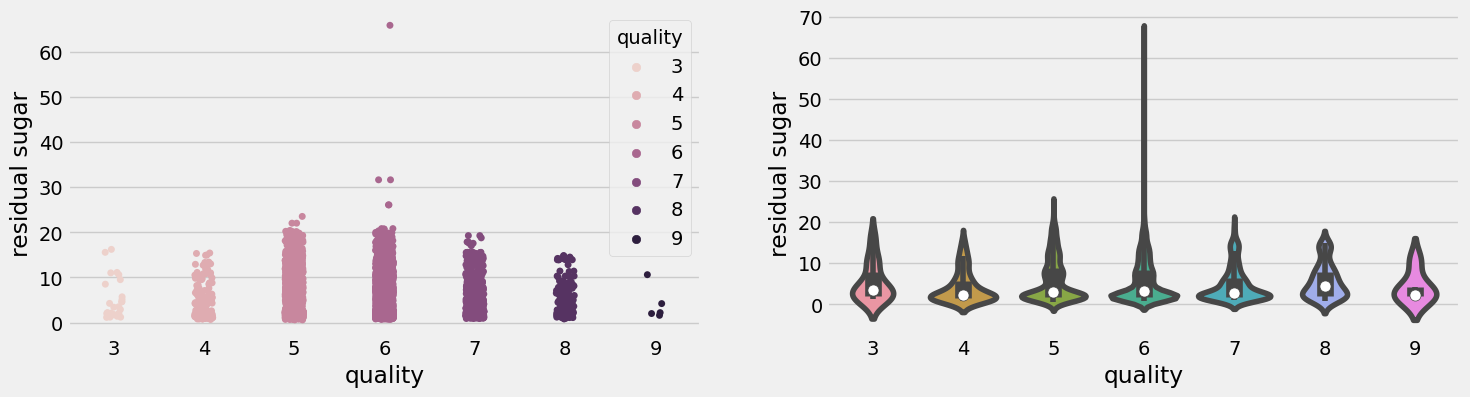

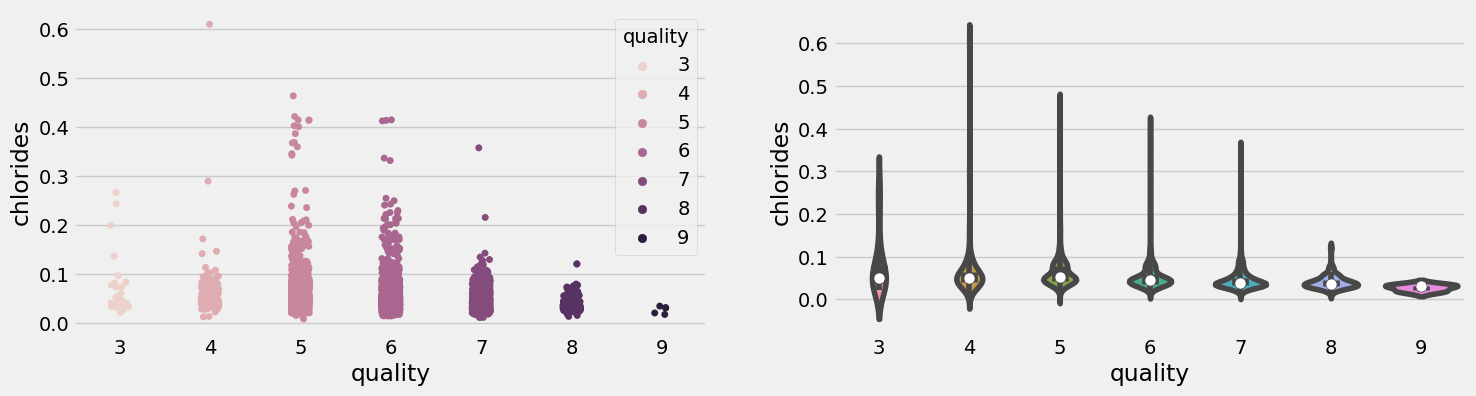

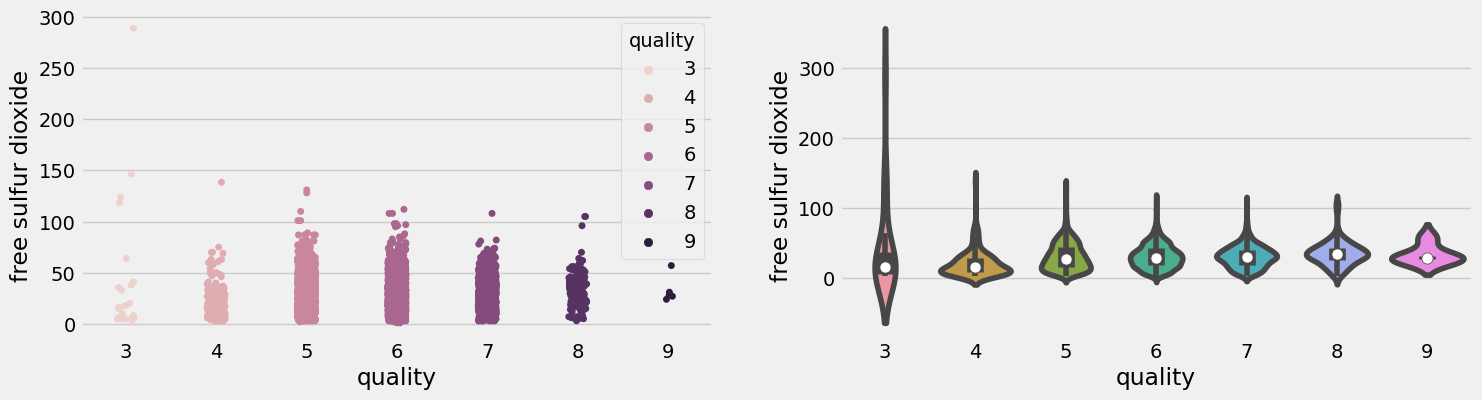

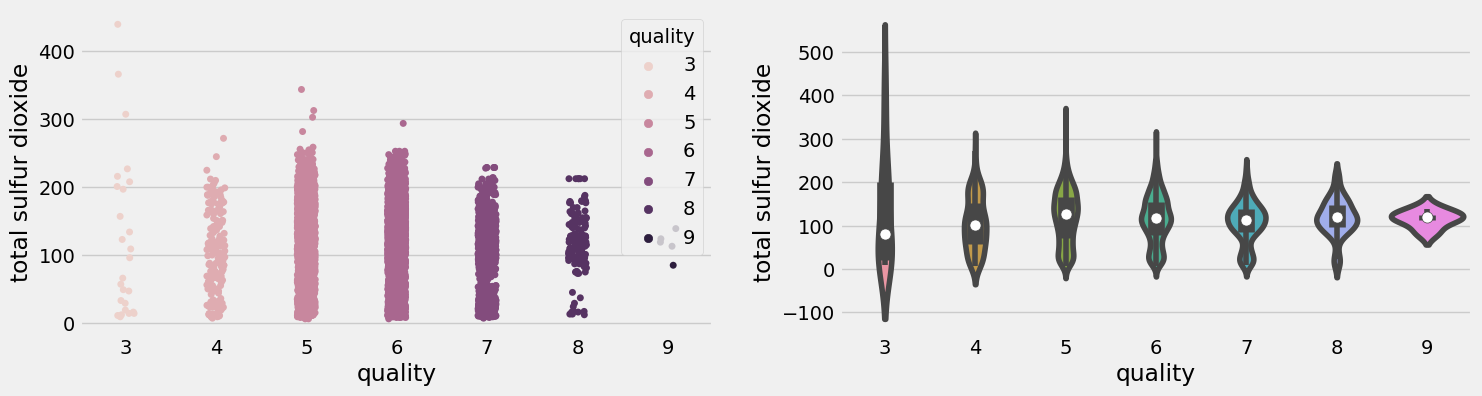

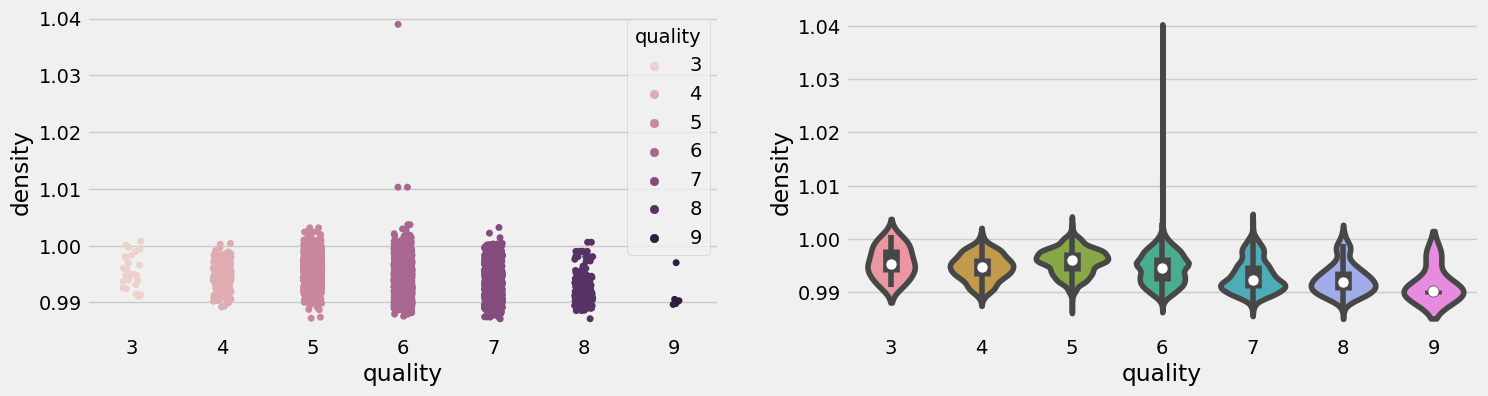

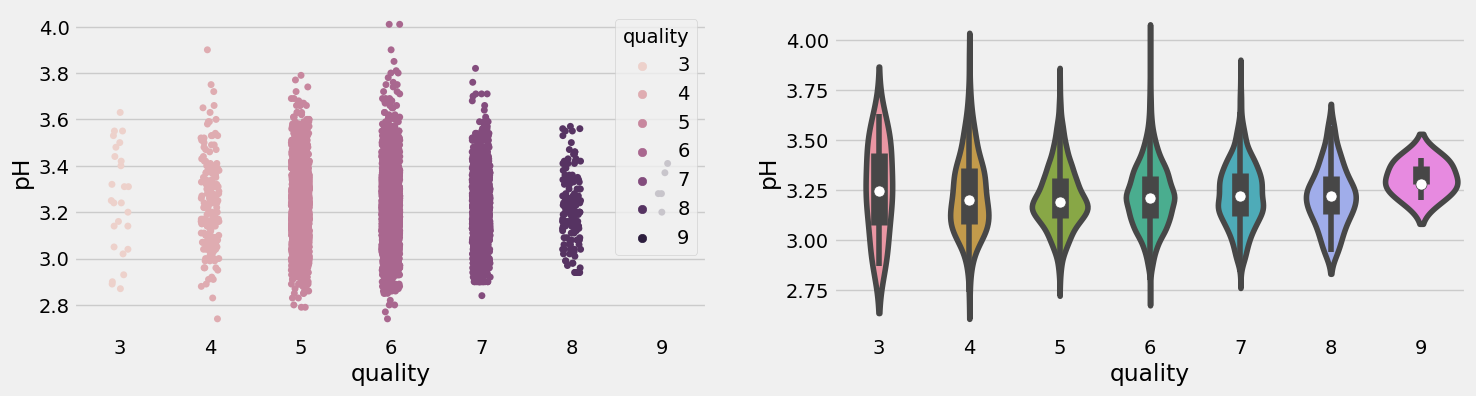

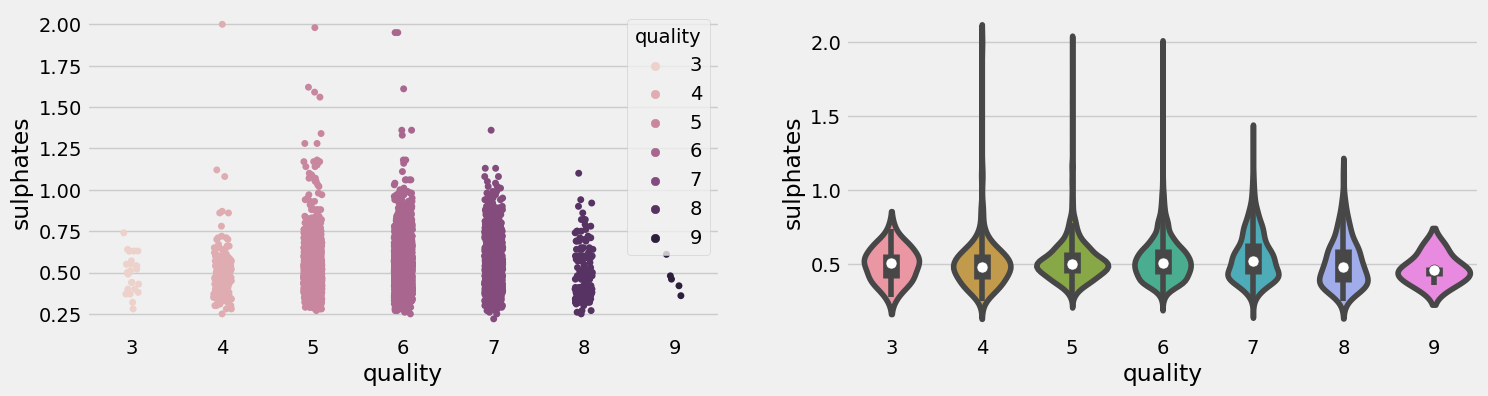

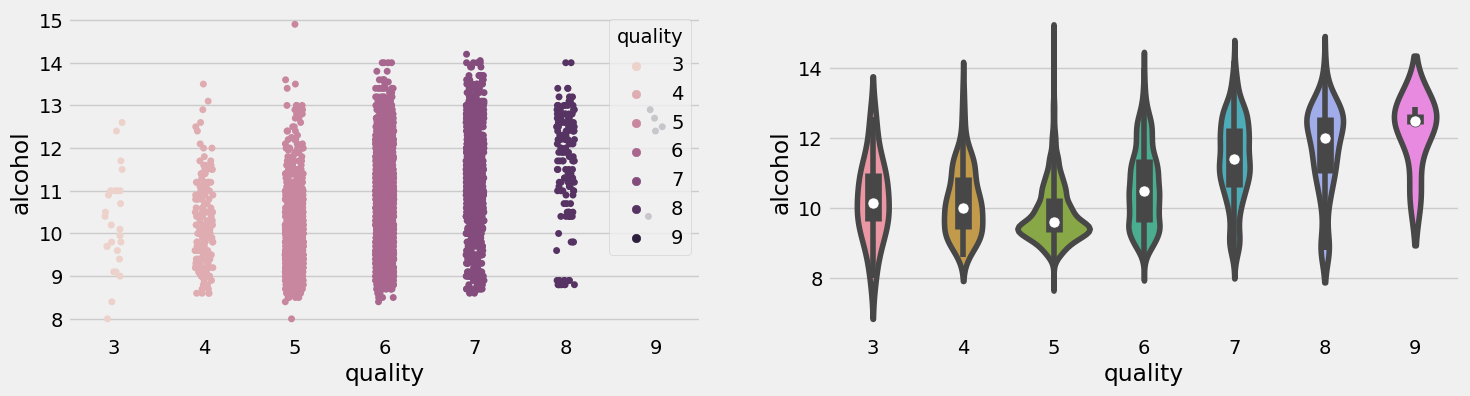

In [14]:
# train에서 각 변수와 quality 변수 사이 분포를 "stripplot", "violinplot"으로 확인하기!
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')
def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize=(16,4))
        sns.stripplot(x=df['quality'],y=df[column], ax=ax[0],hue=df['quality'])
        sns.violinplot(data=df, x='quality', y=column, ax=ax[1])

show_dist_plot(train, numerical_columns)

## <span style="color:green">시각화</span> : 3단계 [7주차 공부]

### <span style="color:red">시각화 공부</span>

#### 시각화 업무 분담 공부 부분
1. 상진 : bubblechart : ?
2. 기현 : pointplot : 연속형과 범주형 비교 [설명변수와 반응변수 비교] {Categorical plots}
3. 혜진 : catplot : 연속형과 범주형 비교 [설명변수와 반응변수 비교] {Categorical plots}
4. 래경 : 연속형 변수[설명변수] 간의 비교 [scatterplot, replot, lineplot] {Relational plots}
- 전에 우리가 진행한 시각화 도구 : countplot, distplot, barplot, stripplot, violinplot
###### 
##### <span style="color:red">Relational plots</span> : relplot, scatterplot, lineplot
- 두가지 변수(x, y)의 관계를 나타내기 위한 그래프
##### Distribution plots : displot, hisplot, kdeplot, ecdfplot, rugplot, distplot
- 변수 하나(x or y) 혹은 변수 두개 (x,y)의 값 분포를 나타내기 위한 그래프
##### <span style="color:orange">Categorical plots</span> : catplot, stripplot, swarmplot, boxplot, violinplot, boxenplot, pointplot, barplot, countplot
- 범주형 변수 (ex. Male/Female, Yes/No)와 연속형 변수(숫자) 간의 관계를 나타내기 위한 그래프
###### 
##### Regression plots : Implot, regplot, residplot
- 회귀(regression) 분석 결과를 relational p lots과 함께 나타내주는 그래프
##### Matrix plots : heatmap, clustermap
- 연속형 변수(숫자) 간의 관계 비율을 2차원 메트릭스로 만들고 그 비율에 따라 색을 입혀서 시각화
##### Multi-plot grids : FacetGrid, pairplot, PairGrid, jointplot, JointGrid
- 여러 그래프를 함께 그려 한눈에 비교하기 위한 그래프

- index : 구분자 <span style="color:green">[범주형-순서형]</span> 의미 없음
- quality : 품질 <span style="color:blue">[범주형-명목형]</span> 3 ~ 9(높을 수록 좋은 품질) [종속변수]
- fixed acidity : 산도 <span style="color:red">[수치형-연속형]</span> 
- volatile acidity : 휘발성산 <span style="color:red">[수치형-연속형]</span> 
- citric acid : 시트르산 <span style="color:red">[수치형-연속형]</span> 
- residual sugar : 잔당(발효 후 와인 속에 남아있는 당분) <span style="color:red">[수치형-연속형]</span> 
- chlorides : 염화물 <span style="color:red">[수치형-연속형]</span> 
- free sulfur dioxide : 독립 이산화황 <span style="color:red">[수치형-연속형]</span> 
- total sulfur dioxide : 총 이산화황 <span style="color:red">[수치형-연속형]</span> 
- density : 밀도 <span style="color:red">[수치형-연속형]</span> 
- pH : 수소이온농도 <span style="color:red">[수치형-연속형]</span> 
- sulphates : 황산염 <span style="color:red">[수치형-연속형]</span> 
- alcohol : 도수 <span style="color:red">[수치형-연속형]</span> 
- type : 종류 <span style="color:blue">[범주형-명목형]</span> white or red

In [67]:
# matplotlib 라이브러리를 사용해도 되고, seaborn 라이브러리를 사용해도 되고 다 상관 없음

matplotlib.pyplot.scatter(x, y, # 가로 세로 값들
            s=None, # 포인트 사이즈(크기)
            c=None, # 포인트 색깔
            marker=None, # 포인트 모양
            cmap=None, # colormap을 뜻함 [어떻게 사용하는지 아직 잘 모르겠음]
            norm=None, # 밝기 데이터라는데..? [어떻게 사용하는지 아직 잘 모르겠음]
            vmin=None, vmax=None, # 최대 최소
            alpha=None, # 투명도
            linewidths=None, # 테두리선
            edgecolors=None, # 테두리선 색깔
            data=None, # 데이터 받기
            **kwargs) # collection 속성 받기

NameError: name 'x' is not defined

<Axes: xlabel='fixed acidity', ylabel='density'>

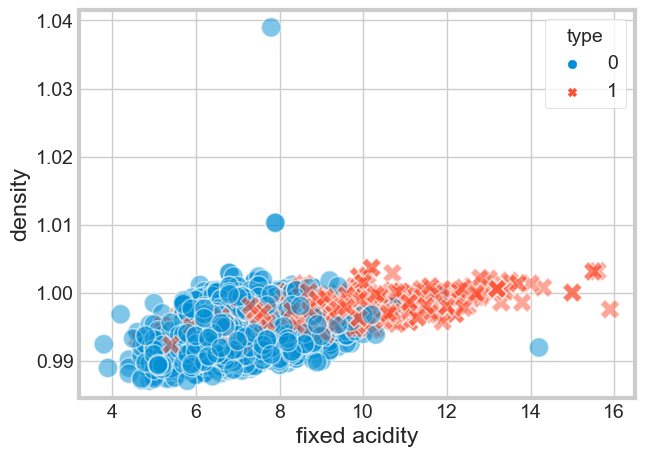

In [61]:
# Relational plots
# scatterplot을 그려주기 위해서는 3가지 파라미터가 꼭 필요힘 
# x축 데이터 컬럼명, y축 데이터 컬럼명, 데이터 셋

# 색 구분 옵션 (hue)
# hue는 의미에 따라서 점의 색깔을 다르게 표시하는 기능을 갖고 있음
# hue 파라미터에 범주형 데이터의 컬럼명을 입력함으로써 데이터를 구분해줄 수 있음
# 왼쪽 위를 보면 자동으로 범례(Legend)가 들어가 있는데, matplotlib에서는 따로 설정을 해주어야 함!

# 모양 구분 옵션 (style)
# 데이터를 하나 더 추가하여 더욱 세분화 해서 표현하고 싶다면 style 파라미터를 이용
# hue가 색이었다면 style은 마커의 모양을 의미

# s는 size, c는 color
# alpha는 transparency(투명도), cmap은 colormap [hue랑 같이 쓰면 의미 없는 듯]
sns.set_style('whitegrid') # 뒷 배경 그리드 설정
sns.scatterplot(
    x='fixed acidity',
    y='density',
    hue='type', # hue_order로 각각 지정해도 됨
    style='type', # style_order로 각각 지정해도 됨
    # marker='+', # style과 markers 같이 쓰먼 의미 없음
    s=200, # size나 size_order로 각각 지정해도 됨 "혹은 sizes=(15, 200)으로 각각 다르게도 표현 가능"
    # c='#33FFCE', # hue와 c(colors) 같이 쓰면 의미 없음
    alpha=0.5,
    # cmap='Spectral', # cmap도 딱히 의미 없는듯?
    data=train)

<Axes: xlabel='fixed acidity', ylabel='density'>

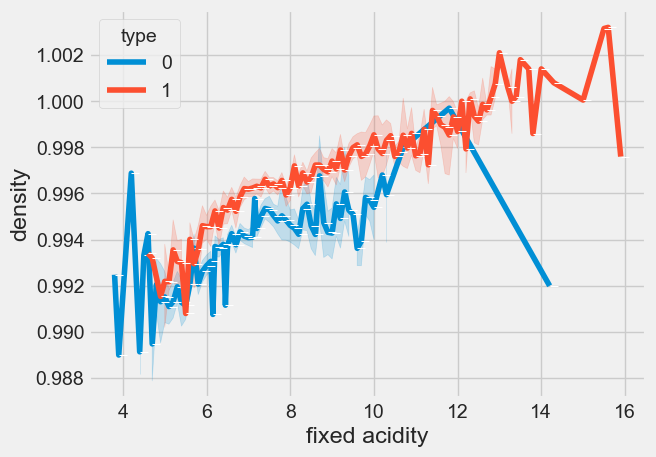

In [69]:
# line 그래프는 데이터가 연속적일 경우 주로 사용
# lineplot 역시 hue와 style 파라미터를 설정해줄 수 있으며, Marker도 나타낼 수 있음.
# x에 대한 y값이 여러개여서 아래와 같이 하나의 선이 아닌 범위(?) 그래프가 그려짐
# -> 이러한 그래프는 seaborn 라인 그래프의 장점으로, 짙은 선은 추정 회귀선(Estimated regression line)
# -> 옅은 하늘색 영역은 신뢰구간(Confidence interval)을 나타냄
sns.lineplot(x='fixed acidity', y='density', hue='type', marker=True, data=train)

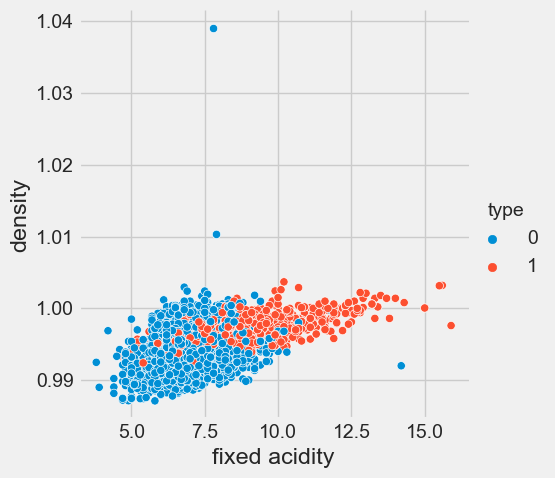

In [70]:
# relplot은 파라미터로 kind="scatter" 혹은 "line"을 입력해주면 두 그래프를 relplot을 이용하여 동일하게 사용가능
sns.relplot(x='fixed acidity', y='density', kind='scatter', hue='type', data=train)
# 단순히 lineplot과 scatterplot을 합쳐놓은거라면 굳이 relplot라는 함수를 만들어 놓을 이유가 없지 않는가?
# relplot은 return 값이 FaceGrid고, lineplot와 scatterplot는 return 값이 AxesSubplot임
# 쉽게 말해 relplot은 여러 그래프를 한 번에 그려줄 수 있고, 나머지 두 함수는 그래프 하나씩만 표현 할 수 있음.
# 즉, replot = lineplot + scatterplot

# 결론은 relplot 사용을 습관화 해야함. 언제든 scatterplotd이나 lineplot으로 바꿀 수 있으며, 한 번에 여러개 표현 가능
# 다만, 코드 길이기 길어져 가독성을 떨어뜨릴 수 있는 위험성이 있으니 주의

### <span style="color:red">실습</span> : 범주형은 비교 X [즉, 반응변수와 설명변수 간의 비교는 미실시]

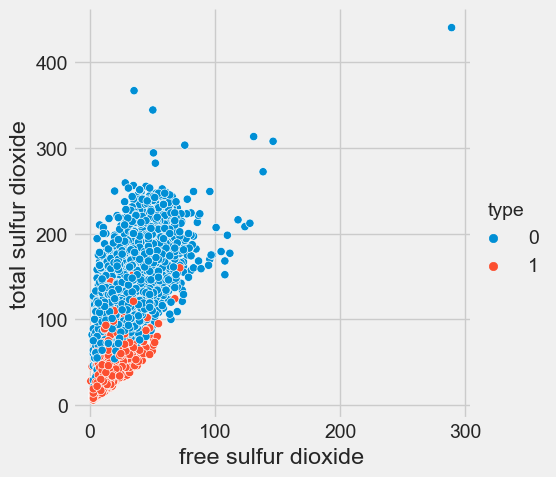

In [71]:
# [1] 상관관계 0.72 독립이산화황과 총이산화황
sns.relplot(x='free sulfur dioxide', y='total sulfur dioxide', kind='scatter', hue='type', data=train)

# 해석 : 같은 이산화황이라 상관관계가 높았을 것이고
# 해석 : white와인(0)이 red와인(1)보다 총이산화황이 대부분 높은 것을 확인
# 해석 : 이상치는 독특한 1개 빼고는 의미 없음.
# 해석 : 즉, white와인이 특정 박테이라와 효모를 죽여 와인의 보관도를 red와인보다 더 높음.

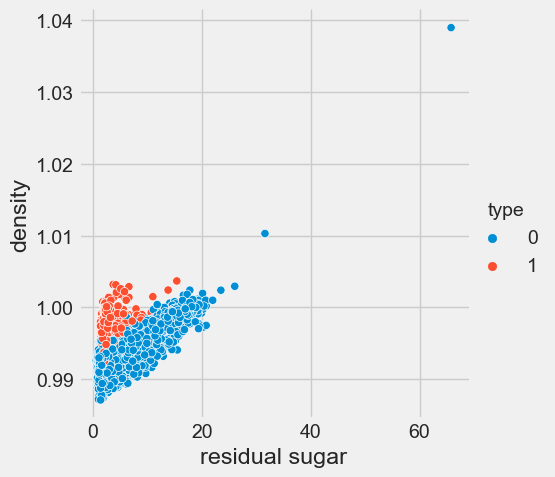

In [73]:
# [2] 상관관계 0.56 잔당과 밀도
sns.relplot(x='residual sugar', y='density', kind='scatter', hue='type', data=train)

# 해석 : 상관관계 설명 X
# 해석 : white와인(0)과 red와인(1) 둘 다 잔당이 커질수록 밀도가 커짐
# 해석 : 즉, 단맛이 강할 수록 바디감이 높다(?)
# 해석 : 이상치는 독특한 1개 빼고는 의미 없음.
# 해석 : 같은 잔당 기준 밀도는 white와인(0)이 red와인(1)보다 낮음

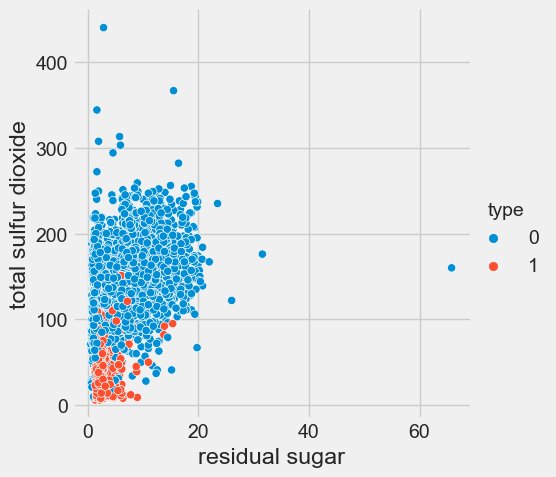

In [75]:
# [3] 상관관계 0.49 잔당과 총이산화황
sns.relplot(x='residual sugar', y='total sulfur dioxide', kind='scatter', hue='type', data=train)

# 해석 : 상관관계 설명 X
# 해석 : 같은 잔당 기준 white와인(0)이 red와인(1) 보다 총이산화황이 높음
# 해석 : 즉, 같은 단맛 기준 와인의 보관도는 red와인 보다 white와인이 더 높음 
# 해석 : 이상치는 딱히 없음

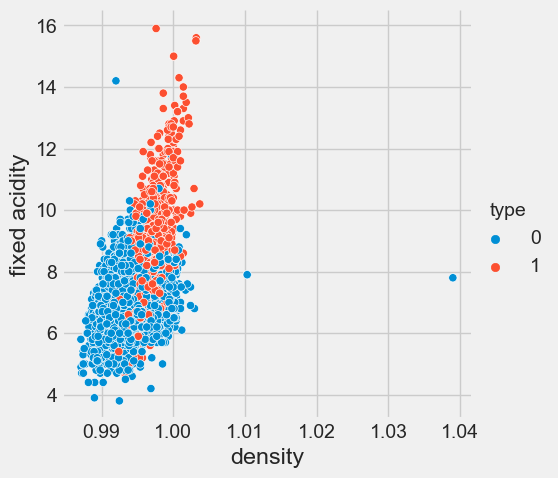

In [76]:
# [4] 상관관계 0.45 밀도와 산도
sns.relplot(x='density', y='fixed acidity', kind='scatter', hue='type', data=train)

# 해석 : 상관관계 설명 X
# 해석 : white와인(0)과 red와인(1) 둘 다 잔당이 커질수록 밀도가 커짐
# 해석 : 밀도가 높아질 수록 산도가 높아짐 [기울기가 높음]
# 해석 : 이상치는 독특한 1개 빼고는 의미 없음.
# 해석 : 같은 잔당 기준 밀도는 white와인(0)이 red와인(1)보다 낮음

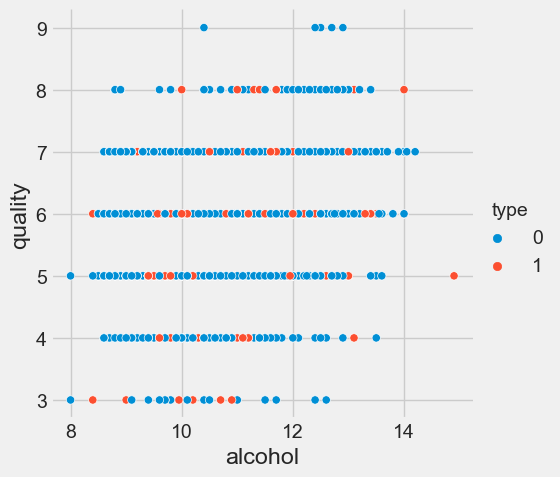

In [77]:
# [5] 상관관계 0.44 알코올과 품질
sns.relplot(x='alcohol', y='quality', kind='scatter', hue='type', data=train)

# 해석 : scatterplot 특징은 연속형끼리의 비교에서 큰 효과를 보여줌

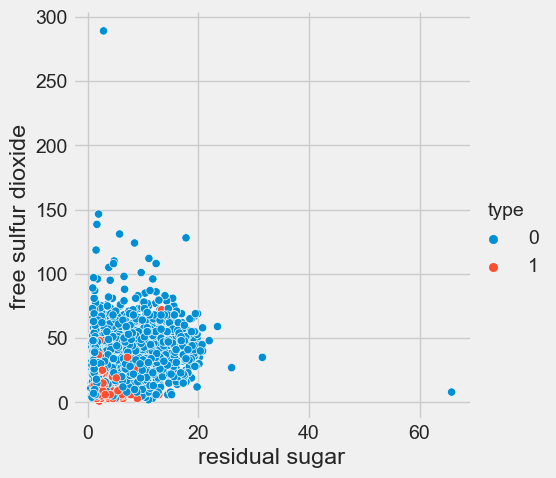

In [78]:
# [6] 상관관계 0.4 잔당과 독립이산화황
sns.relplot(x='residual sugar', y='free sulfur dioxide', kind='scatter', hue='type', data=train)

# 해석 : 상관관계 설명 X
# 해석 : 후에, 이상치를 제거하고 다시 봐야할 듯
# 해석 : red와인이 더 안쪽에 있다는 결론 말고는 딱히 없음
# 해석 : 이상치는 두개

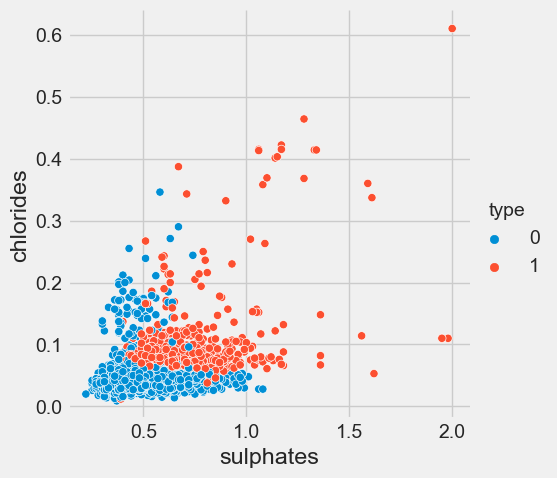

In [80]:
# [7] 상관관계 0.4 황산염과 염화물
sns.relplot(x='sulphates', y='chlorides', kind='scatter', hue='type', data=train)

# 해석 : 상관관계 설명 X
# 해석 : 다른 것들과는 다르게 유독 red와인(1)에서 큰 변화를 보여줌
# 해석 : 같은 황산염 기준 염화물의 비중이 white와인(0)이 더 낮음
# 해석 : 이상치는 판단이 어려움 (눈대중으로는 1개)

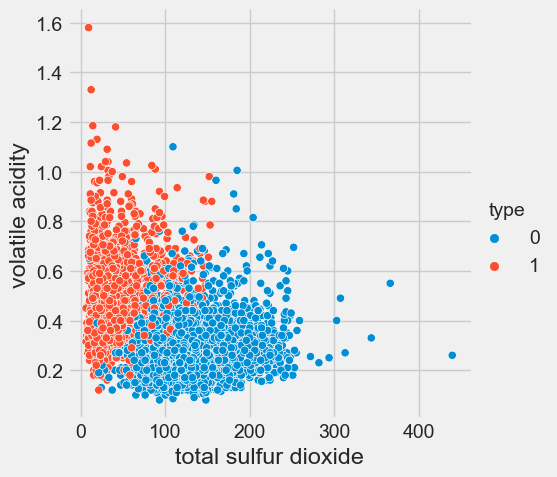

In [81]:
# [8] 상관관계 -0.42 총이산화황과 휘발성산
sns.relplot(x='total sulfur dioxide', y='volatile acidity', kind='scatter', hue='type', data=train)

# 해석 : 상관관계 설명 X
# 해석 : 이상치는 모르겠음
# 해석 : 뭔가 딱 보기좋게 나뉘었는데, 해석을 어떻게 해야할지 모르겠음

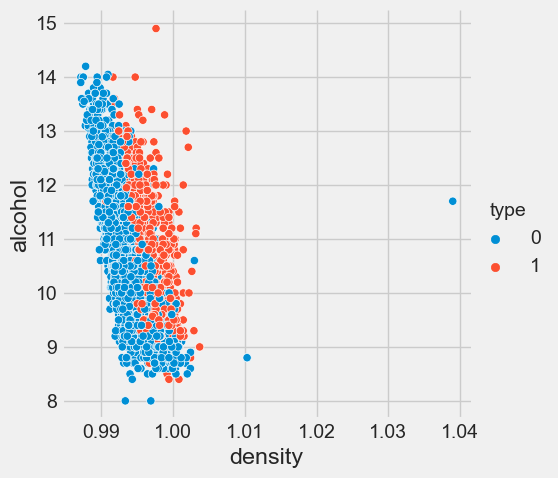

In [82]:
# [9] 상관관계 -0.69 밀도와 알코올
sns.relplot(x='density', y='alcohol', kind='scatter', hue='type', data=train)

# 해석 : 상관관계 설명 X
# 해석 : white와인(0)보다 red와인(1)이 같은 알코올 기준 밀도가 더 높음
# 해석 : 이상치는 1개

## <span style="color:purple">모델링</span> : 4단계

- 생각1 : 각각읭 scale(단위)가 다르기 때문에, 추 후에 모델링 할 때 '표준화'를 해야할 것 같다. [단위 통일] (ex. density와 pH 단위가 다르다.)
- 생각2 : test 데이터에는 종속변수가 없으므로 모델링에서 train_test_split() 함수 사용해야한다.

In [ ]:
# 모델에 입력하기 전 데이터를 정형합니다.
train_x = train.drop(['index', 'quality'], axis = 1)
train_y = train['quality']
test_x = test.drop('index', axis = 1)

In [ ]:
# 학습된 모델로 test 데이터 예측
y_pred = model.predict(test_x)
submission = pd.read_csv('sample_submission.csv')
submission['quality'] = y_pred
submission
# csv 파일로 저장합니다.
submission.to_csv('baseline.csv', index=False)

In [ ]:
# 4. 모델을 생성 및 훈련합니다.
model = lgbm.LGBMClassifier()
model.fit(train_x,train_y)
y_pred = model.predict(test_x)
y_pred

# <span style="color:cyan">참고문헌</span>
###### url : https://dacon.io/competitions/open/235610/overview/description
###### 참고[EDA] : Dacon 코드공유 3개 + Google[의미 없었음]
###### 참고[모델링] : https://data-marketing-bk.tistory.com/28
###### 참고[시각화1] : https://coding-kindergarten.tistory.com/120
###### 참고[시각화2] : https://datascienceschool.net/01%20python/05.01%20시각화%20패키지%20맷플롯리브%20소개.html
###### 참고[시각화3] : https://wikidocs.net/92110
###### 참고[scatterplot] : https://kongdols-room.tistory.com/92